In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib


In [2]:
#load dataset
df = pd.read_csv("E:/Colombo_AQI/backend/colombo_aqi_dataset.csv")
df.head()


,Year,Month,Day,Hour,Day_of_Week,Weekend,Public_Holiday,Location,Zone_Type,Road_Type,...,Wind_Speed_kmh,Wind_Direction,Atmospheric_Pressure_hPa,Traffic_Density,Vehicle_Count_Per_Hour,Rush_Hour,Industrial_Level,Green_Cover_Percent,Previous_Day_AQI,AQI_US
0,2021,1,1,12,Friday,No,No,Avissawella,Suburban,Main Road,...,17.9,W,1007.6,2.32,10656.0,No,5,26,38.4,60.4
1,2021,1,1,22,Friday,No,No,Kotte (Sri Jayawardenepura Kotte),Urban,Main Road,...,10.2,SE,1010.2,2.53,18173.0,No,6,23,77.9,83.4
2,2021,1,2,4,Saturday,Yes,No,Horana,Suburban,Secondary Road,...,13.5,W,1015.7,0.77,6289.0,No,7,18,82.3,49.4
3,2021,1,2,22,Saturday,Yes,No,Kolonnawa,Commercial/Industrial,Main Road,...,11.1,SW,1013.1,2.64,16020.0,No,7,9,60.0,93.8
4,2021,1,3,3,Sunday,Yes,No,Thalawathugoda,Suburban,Main Road,...,11.5,S,1008.1,1.39,7901.0,No,6,25,70.6,48.6


In [3]:
#Dataset Overview
print("Dataset Shape:", df.shape)
df.info()
df.describe()


Dataset Shape: (5000, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      5000 non-null   int64  
 1   Month                     5000 non-null   int64  
 2   Day                       5000 non-null   int64  
 3   Hour                      5000 non-null   int64  
 4   Day_of_Week               5000 non-null   object 
 5   Weekend                   5000 non-null   object 
 6   Public_Holiday            5000 non-null   object 
 7   Location                  5000 non-null   object 
 8   Zone_Type                 5000 non-null   object 
 9   Road_Type                 5000 non-null   object 
 10  Population_Density        5000 non-null   int64  
 11  Distance_to_Factory_km    5000 non-null   float64
 12  Construction_Level        5000 non-null   object 
 13  Season                    5000 non-nu

,Year,Month,Day,Hour,Population_Density,Distance_to_Factory_km,Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Atmospheric_Pressure_hPa,Traffic_Density,Vehicle_Count_Per_Hour,Industrial_Level,Green_Cover_Percent,Previous_Day_AQI,AQI_US
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2023.485800,6.488600,15.624200,11.512600,5892.494800,4.419366,29.196780,82.559540,80.36828,15.013680,1011.076900,2.52086,15053.523400,6.407800,17.870600,77.702740,77.338740
std,1.701992,3.470487,8.725789,6.917298,1149.647643,1.577414,1.402405,6.976871,52.89487,5.162065,3.958531,0.99457,5883.953356,1.319942,4.640535,27.452886,26.916119
min,2021.000000,1.000000,1.000000,0.000000,2268.000000,0.500000,25.000000,60.000000,0.90000,3.000000,999.000000,0.40000,3249.000000,2.000000,5.000000,35.000000,35.000000
25%,2022.000000,3.000000,8.000000,5.000000,5087.000000,3.370000,28.275000,77.900000,40.57500,11.400000,1008.400000,1.73000,10287.000000,6.000000,15.000000,56.600000,57.300000
50%,2023.000000,6.000000,16.000000,12.000000,5792.000000,4.450000,29.200000,82.700000,68.40000,14.800000,1011.000000,2.46000,14670.500000,6.000000,18.000000,75.400000,75.000000
75%,2025.000000,10.000000,23.000000,17.000000,6633.250000,5.520000,30.100000,87.300000,107.80000,18.400000,1013.800000,3.23000,19282.000000,7.000000,21.000000,95.700000,94.800000
max,2026.000000,12.000000,31.000000,23.000000,9894.000000,9.320000,34.000000,98.000000,250.00000,34.700000,1022.000000,5.55000,32829.000000,10.000000,37.000000,210.400000,204.300000


In [4]:
#Missing Values Handling
df.isnull().sum()
df = df.dropna()


In [5]:

# Check for duplicate rows

print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [6]:

# Remove duplicate rows


df = df.drop_duplicates()
print("Dataset shape after removing duplicates:", df.shape)


Dataset shape after removing duplicates: (5000, 27)


In [7]:
# ==============================
# Separate features (X) and target (y)
# ==============================

X = df.drop("AQI_US", axis=1)   # input features
y = df["AQI_US"]               # target variable - (AQI)


In [8]:
# -------------------------------
# Save label encoders (IMPORTANT)
# -------------------------------
import joblib
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

categorical_cols = X.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

joblib.dump(label_encoders, "label_encoders.pkl")
print("Saved: label_encoders.pkl")


Saved: label_encoders.pkl


In [9]:
# ----------------------------
# Train-Test Split
# ----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Testing set :", X_test.shape)


Training set: (4000, 26)
Testing set : (1000, 26)


In [10]:
# ----------------------------
# Standardize features (Scaling)
# ----------------------------


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# ----------------------------
# Train Random Forest Regressor
# ----------------------------

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

print("Model training completed.")


Model training completed.


In [12]:
# ----------------------------
# Model Evaluation (Regression Metrics)
# ----------------------------

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)


MAE : 7.502249000000002
RMSE: 9.870059919777592
R2  : 0.8634418722411542


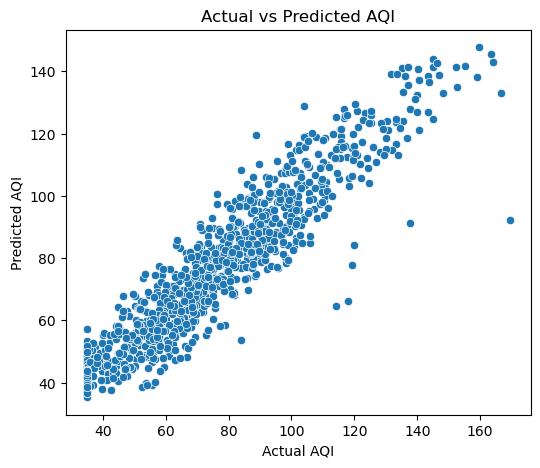

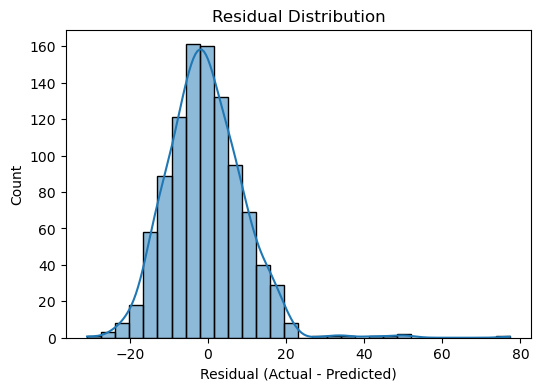

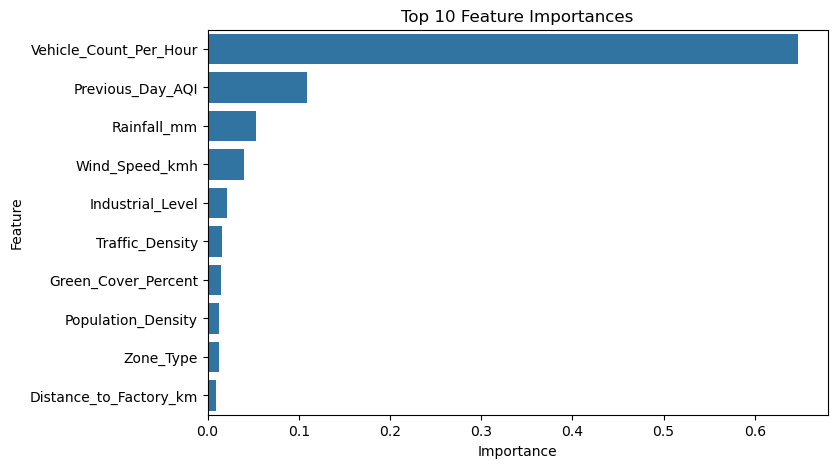

In [13]:
# ----------------------------
# Graphs
# ----------------------------

# 1) Actual vs Predicted
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.show()

# 2) Residual distribution
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()

# 3) Feature importance (Random Forest)
import pandas as pd
import numpy as np

importances = model.feature_importances_
feature_names = X.columns

fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=fi.values[:10], y=fi.index[:10])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [14]:
# ==============================
# Save trained model and scaler
# ==============================

from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scaler", scaler),
    ("model", model)
])

import joblib
joblib.dump(pipe, "aqi_pipeline.pkl")

print("Pipeline saved")



Pipeline saved
